<h1>Project: Investigate a Dataset - TMDB Data Analysis</h1>

## Table of contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

<b>Welcome!</b>

This project seeks to proffer answers to the set of questions listed below, by analysing the TMDB datasets which can also be assessed below. 

The following libraries will be utilized in this analysis: <b>Numpy, Pandas, Seaborn, and the ever reliable Matplotlib. </b>

We will analyze our dataset to understand the relationship between variables like movie budgets, revenue, genres, popularity and vote counts and the impact they have in determining the overall success of a movie.

Eye catchy visualizations like box plots, bar charts and histograms will also be used to extract valuable insights from our datasets. 

In the end, we would understand which variables are the most important in determining how a movie turns out after its release. 


## Data description:

The TMDB Dataset was gotten from Kaggle. It contains 21 columns and 10,866 rows of data. Columns like imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production companies contains null values. This dataset contains data that could help predict which films will be highly rated, whether or not they are a commercial success or a failure.

## Columns

### The TMDB dataset contains 21 columns. Some of the columns are listed and explained below.

 - popularity: This column contains the movie rating. The highest of which is 32.98 and the lowest rating is 6.5 in form of    floats.
 
 - budget: This column describes the amount invested into the movie numerically in form of integers.
 
 - homepage: This column contains the official websites of the movie in form of objects or strings. Several of the columns    contain null values.
 
 - director: Here, the name of the director of each movie is listed in form of objects.
 
 - genres: The movies are categorized in this column in form of objects.
 
 - revenue: The amount of money generated by each movie is displayed in this column in form of integers.




<h2>Investigation of the TMDB movie DataSet</h2>

These are some of the questions this project seeks to provide answers to:

    
 - What is the average revenue generated by movies?
    
 - Does the revenue generated from movies increase from year to year?
    
 - Does movie budgets play any major role in the popularity of movies?
    
 - Is there a correlation between budget and revenue generated?
    
    
    

<h4>Analyze your Data</h4>

In [33]:
#Import NumPy, pandas, and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import datetime as dt


<a id='wrangling'></a>

## Data Wrangling

Here, we load the TMDB Dataset into our Jupyter notebook.

In [10]:
tm = pd.read_csv('tmdb-movies.csv')

<h4>Inspecting datatypes to find missing or dirty data</h4>

To know the shape/structure of our datasets in terms of number of rows and columns, using .shape()

In [3]:
tm.shape

(10866, 21)

It is clearly stated above that our TMDB dataset contains 10866 rows and 21 columns of data waiting to be analyzed.

Next, we use .info() to our data structure and to identify columns containing null values, datatypes and the column names associated with them.

In [30]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the output generated above, we can see that homepage, director, tagline, keywords, overview, genres and production companies all contain lots of null values. This could affect the quality and accuracy of our analysis. 

To see what the average revenue generated in our movie dataset is, we call the mean function below.

In [6]:
mean_rev = tm['revenue'].mean()

The average revenue generated is approximately 39,826,896. 

mean_revenue

In [37]:
average_budget = tm['budget'].mean()

To avoid repetitions, we create a function to display the average budget, popularity and revenue of the dataset.

In [35]:
def gross_profit(gp):
    budget = 5000000
    revenue = gp + budget
    return revenue
    

In [36]:
gross_profit(50000)

5050000

In [38]:
type(gross_profit)

function

In [7]:
#To see the first few(10) rows of data in our tabular data
tm.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [8]:
#To see some useful statistics from our dataset
tm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# To see null values
tm.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# To know the movie with the highest popularity rating
highest_popularity = max(tm['popularity'])

In [11]:
highest_popularity

32.985763

In [12]:
#To know the least popularity rating
least_rating = min(tm['popularity'])
least_rating

6.500000000000001e-05

In [13]:
#To see the sum of the null values
tm.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Data Cleaning

In [14]:
# From my investigation so far, some columns contain null values like the homepage column. This has to be cleaned.

In [15]:
# To view duplicates
tm.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [16]:
#To count the number of duplicates and remove them
sum(tm.duplicated())


1

In [17]:
tm.drop_duplicates(inplace=True)

In [18]:
# To count the duplicates again 
sum(tm.duplicated())

0

In [19]:
# The duplicate columns have been removed or dropped.

<a id='eda'></a>

## Exploratory Data Analysis

#### Research question 1: Is there a positive correlation between release_year and revenue generated from year to year?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD7BFAD688>,
      dtype=object)

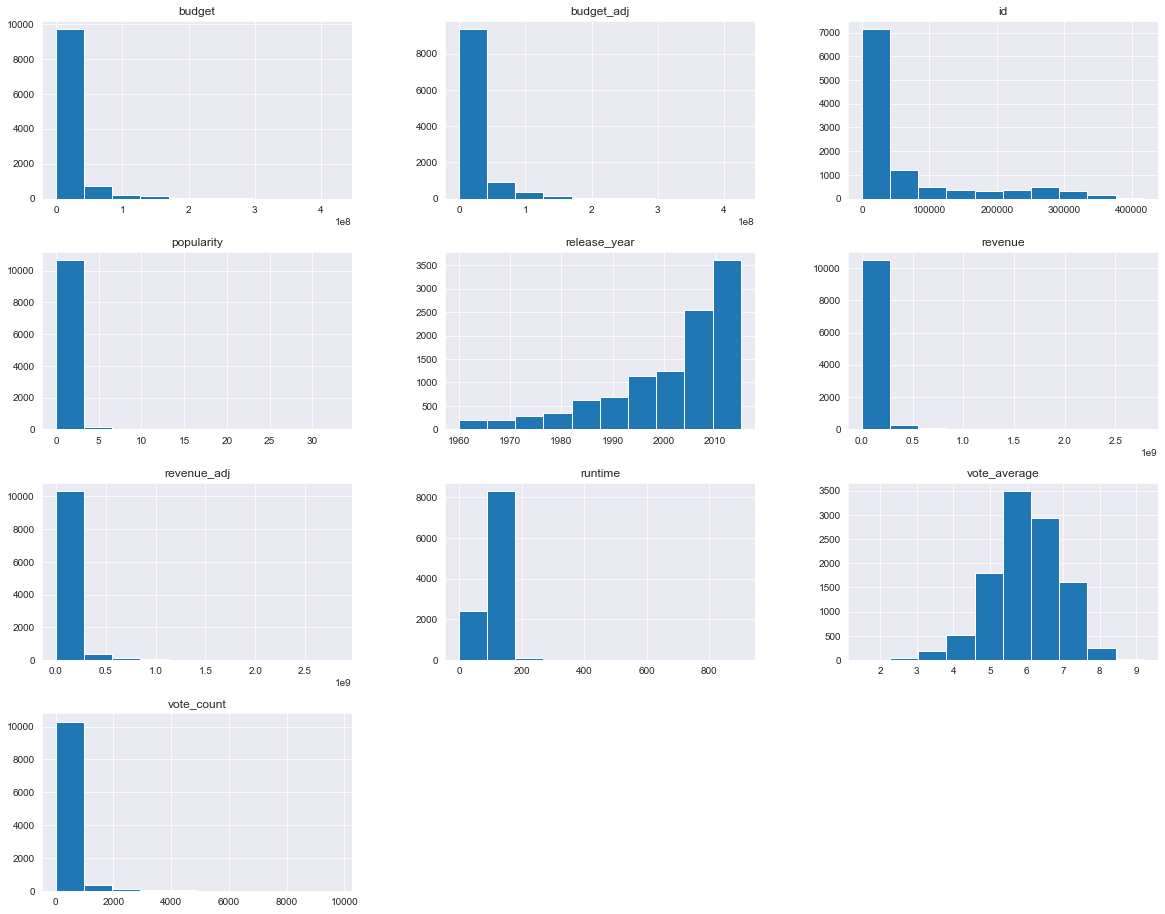

In [20]:
tm.hist(figsize=(20,16))

#### Observation The revenue generated by movies increased from year to year.

In [21]:
# To compare the movie genre vs the popularity, we plot a bar chart to visualize our thoughts using matplotlib
# First, we count the unique or distinct values in 'popularity' column.
tm['revenue'].value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
             ... 
53676580        1
617000          1
13001257        1
504050219       1
20518905        1
Name: revenue, Length: 4702, dtype: int64

A box plot is created to explore the insights gotten from our analysis.

In [23]:
tm_1 = tm.groupby(['genres'])[['id']].count().sort_values(by=['id'], ascending=False)[0:5]
tm_1

,id
genres,
Comedy,712
Drama,712
Documentary,312
Drama|Romance,289
Comedy|Drama,280


Just before you start plotiing and visualizing your data, you have to create a new variable.

In [24]:
tm_new = tm[tm['genres'].isin(tm_1.index.values.tolist())]
tm_new

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
23,216015,tt2322441,4.710402,40000000,569651467,Fifty Shades of Grey,Dakota Johnson|Jamie Dornan|Jennifer Ehle|Eloi...,https://www.facebook.com/fiftyshadesofgreymovie,Sam Taylor-Johnson,Are you curious?,...,When college senior Anastasia Steele steps in ...,125,Drama|Romance,Focus Features|Trigger Street Productions|Mich...,2/11/15,1865,5.3,2015,3.679998e+07,5.240791e+08
24,318846,tt1596363,4.648046,28000000,133346506,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,http://www.thebigshortmovie.com/,Adam McKay,This is a true story.,...,The men who made millions from a global econom...,130,Comedy|Drama,Paramount Pictures|Plan B Entertainment|Regenc...,12/11/15,1545,7.3,2015,2.575999e+07,1.226787e+08
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08
39,167073,tt2381111,3.227329,11000000,62076141,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,http://www.foxsearchlight.com/brooklyn/,John Crowley,"Two countries, two loves, one heart",...,"In 1950s Ireland and New York, young Ellis Lac...",111,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,11/4/15,754,7.3,2015,1.012000e+07,5.711002e+07
51,257211,tt2361509,2.814802,35000000,194564672,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,http://www.theinternmovie.com/,Nancy Meyers,Experience never gets old,...,70-year-old widower Ben Whittaker has discover...,121,Comedy,Waverly Films|Warner Bros.,9/24/15,1255,7.1,2015,3.219999e+07,1.789994e+08
53,274479,tt2446980,2.793297,60000000,101134059,Joy,Jennifer Lawrence|Bradley Cooper|Robert De Nir...,http://www.foxmovies.com/movies/joy,David O. Russell,NaN,...,A story based on the life of a struggling Long...,124,Comedy|Drama,Fox 2000 Pictures|Davis Entertainment|Annapurn...,12/24/15,1001,6.4,2015,5.519998e+07,9.304329e+07
55,295964,tt2503944,2.584264,20000000,36606743,Burnt,Bradley Cooper|Sienna Miller|Lily James|Alicia...,http://burntmovie.com/,John Wells,Never underestimate a man with everything to l...,...,Adam Jones is a Chef who destroyed his career ...,100,Drama,Double Feature Films|PeaPie Films|3 Arts Enter...,10/2/15,631,6.3,2015,1.839999e+07,3.367819e+07
58,306819,tt0810819,2.557859,15000000,64191523,The Danish Girl,Eddie Redmayne|Alicia Vikander|Matthias Schoen...,NaN,Tom Hooper,Find the courage to be yourself.,...,When Gerda Wegener asks her husband Einar to f...,120,Drama,Pretty Pictures|Working Title Films|ArtÃ©mis P...,11/27/15,867,7.3,2015,1.379999e+07,5.905618e+07
68,312221,tt3076658,2.331567,35000000,137935567,Creed,Michael B. Jordan|Sylvester Stallone|Graham Mc...,http://creedthemovie.com/,Ryan Coogler,Your legacy is more than a name,...,The former World Heavyweight Champion Rocky Ba...,133,Drama,New Line Cinema|Warner Bros.|Metro-Goldwyn-May...,11/25/15,1171,7.3,2015,3.219999e+07,1.269007e+08
69,271718,tt3152624,2.317670,35000000,140795793,Trainwreck,Amy Schumer|Bill Hader|Brie Larson|Colin Quinn...,NaN,Judd Apatow,We All Know One.,...,Having thought that monogamy was never possibl...,125,Comedy,Universal Pictures|Fuji Television Network|Den...,7/17/15,849,6.1,2015,3.219999e+07,1.295321e+08


In [25]:
tm_new1 = tm_new[tm_new['budget'] > 0]

tm_new1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
23,216015,tt2322441,4.710402,40000000,569651467,Fifty Shades of Grey,Dakota Johnson|Jamie Dornan|Jennifer Ehle|Eloi...,https://www.facebook.com/fiftyshadesofgreymovie,Sam Taylor-Johnson,Are you curious?,...,When college senior Anastasia Steele steps in ...,125,Drama|Romance,Focus Features|Trigger Street Productions|Mich...,2/11/15,1865,5.3,2015,3.679998e+07,5.240791e+08
24,318846,tt1596363,4.648046,28000000,133346506,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,http://www.thebigshortmovie.com/,Adam McKay,This is a true story.,...,The men who made millions from a global econom...,130,Comedy|Drama,Paramount Pictures|Plan B Entertainment|Regenc...,12/11/15,1545,7.3,2015,2.575999e+07,1.226787e+08
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08
39,167073,tt2381111,3.227329,11000000,62076141,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,http://www.foxsearchlight.com/brooklyn/,John Crowley,"Two countries, two loves, one heart",...,"In 1950s Ireland and New York, young Ellis Lac...",111,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,11/4/15,754,7.3,2015,1.012000e+07,5.711002e+07
51,257211,tt2361509,2.814802,35000000,194564672,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,http://www.theinternmovie.com/,Nancy Meyers,Experience never gets old,...,70-year-old widower Ben Whittaker has discover...,121,Comedy,Waverly Films|Warner Bros.,9/24/15,1255,7.1,2015,3.219999e+07,1.789994e+08
53,274479,tt2446980,2.793297,60000000,101134059,Joy,Jennifer Lawrence|Bradley Cooper|Robert De Nir...,http://www.foxmovies.com/movies/joy,David O. Russell,NaN,...,A story based on the life of a struggling Long...,124,Comedy|Drama,Fox 2000 Pictures|Davis Entertainment|Annapurn...,12/24/15,1001,6.4,2015,5.519998e+07,9.304329e+07
55,295964,tt2503944,2.584264,20000000,36606743,Burnt,Bradley Cooper|Sienna Miller|Lily James|Alicia...,http://burntmovie.com/,John Wells,Never underestimate a man with everything to l...,...,Adam Jones is a Chef who destroyed his career ...,100,Drama,Double Feature Films|PeaPie Films|3 Arts Enter...,10/2/15,631,6.3,2015,1.839999e+07,3.367819e+07
58,306819,tt0810819,2.557859,15000000,64191523,The Danish Girl,Eddie Redmayne|Alicia Vikander|Matthias Schoen...,NaN,Tom Hooper,Find the courage to be yourself.,...,When Gerda Wegener asks her husband Einar to f...,120,Drama,Pretty Pictures|Working Title Films|ArtÃ©mis P...,11/27/15,867,7.3,2015,1.379999e+07,5.905618e+07
68,312221,tt3076658,2.331567,35000000,137935567,Creed,Michael B. Jordan|Sylvester Stallone|Graham Mc...,http://creedthemovie.com/,Ryan Coogler,Your legacy is more than a name,...,The former World Heavyweight Champion Rocky Ba...,133,Drama,New Line Cinema|Warner Bros.|Metro-Goldwyn-May...,11/25/15,1171,7.3,2015,3.219999e+07,1.269007e+08
69,271718,tt3152624,2.317670,35000000,140795793,Trainwreck,Amy Schumer|Bill Hader|Brie Larson|Colin Quinn...,NaN,Judd Apatow,We All Know One.,...,Having thought that monogamy was never possibl...,125,Comedy,Universal Pictures|Fuji Television Network|Den...,7/17/15,849,6.1,2015,3.219999e+07,1.295321e+08


,mean,std
genres,,
Comedy,2.318910e+07,2.145831e+07
Comedy|Drama,1.731101e+07,1.798798e+07
Documentary,2.592782e+06,4.251575e+06
Drama,1.825644e+07,1.986337e+07
Drama|Romance,1.839379e+07,1.740442e+07


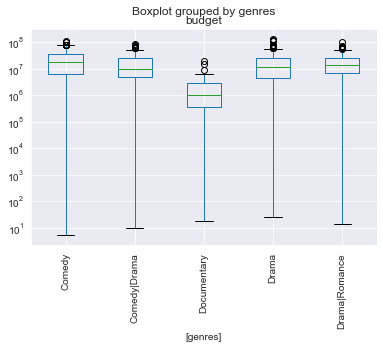

In [26]:
tm_new1.boxplot(column=['budget'], by=['genres'], rot=90).set_yscale('log')
pd.DataFrame(tm_new1.groupby(['genres'])['budget'].describe().loc[:, ['mean', 'std']])

Observation noticed from the box plot above.

The 'comedy' genre clearly has the largest range or spread. 

The 'Documentary' genre has the shortest variability. This means that the 'Second Interquartile Range' or 'Range' is 10 exp 6.

In [24]:
#  Still on investigating the most popular genres 
biggest_budget = tm.sort_values(by=['budget'], ascending = False).head(50)
biggest_budget.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
6570,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,http://www.superman.com,Bryan Singer,NaN,...,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,2.920507e+08,4.230205e+08


Next, we create a Bar Chart to view 

,id
genres,
Comedy,292
Comedy|Drama,116
Documentary,35
Drama,317
Drama|Romance,147


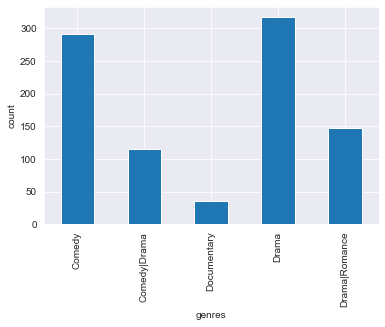

In [29]:
tm_new1.groupby(['genres'])['id'].count().plot(kind='bar').set_ylabel('count')
tm_new1.groupby(['genres'])[['id']].count()

Observations:
Fisrtly, we see that there are five(5) categories of data in the genres column.

Secondly, the Drama genre is the genre with the highest count. This is followed closely by the Comedy genre.

Comparing with the result gotten the box plot, we can see that the Comedy genre has the largest spread, while the Drama genre has the highest count.

In [26]:
# Checking to see the movies which generated the highest revenue(s).
highest_revenue = tm.sort_values(by=['budget'], ascending = False).head(50)
highest_revenue.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
6570,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,http://www.superman.com,Bryan Singer,NaN,...,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,2.920507e+08,4.230205e+08
4411,49529,tt0401729,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,http://disney.go.com/johncarter/,Andrew Stanton,Lost in Our World. Found in Another.,...,Civil War vet John Carter is transplanted to M...,132,Action|Adventure|Fantasy|Science Fiction,Walt Disney Pictures,3/7/12,1479,6.0,2012,2.469335e+08,2.698595e+08
1929,38757,tt0398286,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,http://disney.go.com/disneypictures/tangled/,Nathan Greno|Byron Howard,They're taking adventure to new lengths.,...,When the kingdom's most wanted-and most charmi...,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/24/10,2019,7.3,2010,2.600000e+08,5.917949e+08
7394,559,tt0413300,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,http://www.sonypictures.com/movies/spider-man3/,Sam Raimi,The battle within.,...,The seemingly invincible Spider-Man goes up ag...,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,5/1/07,2083,5.8,2007,2.713305e+08,9.369017e+08
5508,57201,tt1210819,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,...,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/13,1607,6.0,2013,2.386885e+08,8.357833e+07
4367,49051,tt0903624,4.218933,250000000,1017003568,The Hobbit: An Unexpected Journey,Ian McKellen|Martin Freeman|Richard Armitage|A...,http://www.thehobbit.com/,Peter Jackson,From the smallest beginnings come the greatest...,...,"Bilbo Baggins, a hobbit enjoying his quiet lif...",169,Adventure|Fantasy|Action,WingNut Films|New Line Cinem

Observation: There is a positive relationship/correlation between budget and revenue.

### Conclusions:
 - On average, a total of 39,826,896 dollars is generated per movie.
 - The revenue generated by movies increased from year to year.
 - It looks as if there is a positive correlation between budget and revenue column
 - It seems like movies with high budget tend to generate more revenues.
 - The 'comedy' genre clearly has the largest range or spread. 
                        While
 - The 'Documentary' genre has the shortest variability. This means that the 'Second Interquartile Range' or 'Range' is 10    exp 6.
 - We also see that there are five(5) categories of data in the genres column.

 - Secondly, the Drama genre is the genre with the highest count. This is followed closely by the Comedy genre.

 - Comparing with the result gotten the box plot, we can see that the Comedy genre has the largest spread, while the Drama    genre has the highest count.

This Project limitations include but are not limited to the following:
    
 - There are lots of missing/null data in the datasets.
 - The conclusions here are only drawn from descriptive statistics while normally,
    it should be drawn from Machine learning algorithms or inferential statistics.
